# Linear Regression
[[Source](https://realpython.com/linear-regression-in-python/)]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
# Generate random 3-dimensional regression data
features, z = make_regression(n_samples=100, n_features=2, noise=10)
x, y = features[:, 0], features[:, 1]

In [3]:
# Create and fit linear regression model
model = LinearRegression().fit(features, z)
print(f'Z = {model.intercept_} + {model.coef_[0]}X + {model.coef_[1]}Y')

Z = -0.47787184211169187 + 65.97227124743216X + 92.99692841488633Y


In [4]:
# Coefficient of determination
print('R-squared:', model.score(features, z))

R-squared: 0.9897471676954441


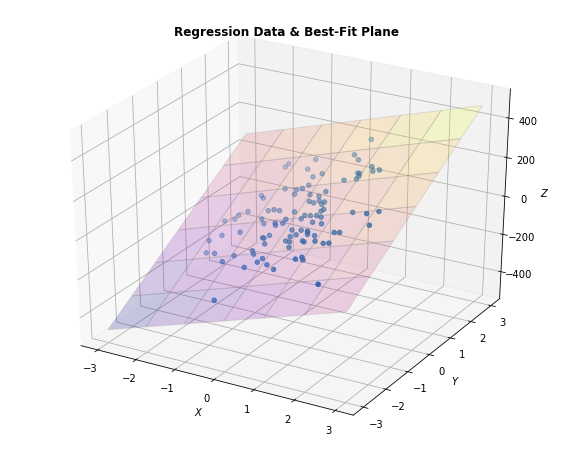

In [5]:
# Plot data and best-fit plane
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)

X, Y = np.meshgrid(range(-3, 4), range(-3, 4))
Z = model.intercept_ + model.coef_[0] * X + model.coef_[1] * Y
ax.plot_surface(X, Y, Z, alpha=0.2, cmap='plasma', edgecolor='gray')

ax.set_title('Regression Data & Best-Fit Plane', fontweight='bold')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.show()

In [6]:
# Predict z of features using model 
z_pred = model.predict(features)

## Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# Generate random 3-dimensional regression data
features, z = make_regression(n_samples=100, n_features=2, noise=50)
x, y = features[:, 0], features[:, 1]

In [9]:
# Create and fit polynomial regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(features)
model = LinearRegression().fit(poly_features, z)
print(f'{model.intercept_}\n{model.coef_}')

-8.271127907460247
[ 8.22115545 43.44130033  2.99017809 -4.92764231  3.98535015]


In [10]:
# Coefficient of determination
print('R-squared:', model.score(poly_features, z))

R-squared: 0.539224620151656


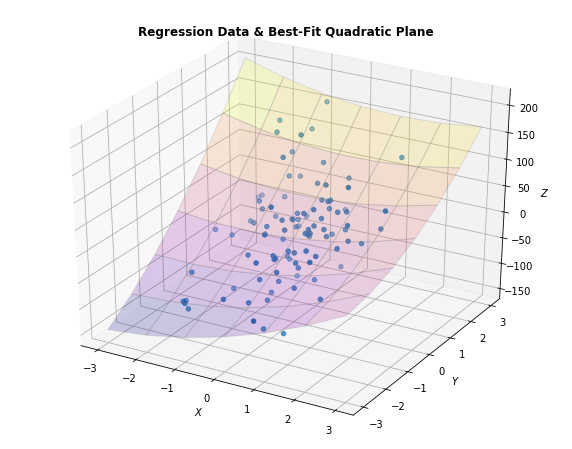

In [11]:
# Plot data and best-fit quadratic surface
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)

X, Y = np.meshgrid(range(-3, 4), range(-3, 4))
coef = model.coef_
Z = model.intercept_ + coef[0] * X + coef[1] * Y + coef[2] * X * X + coef[3] * X * Y + coef[4] * Y * Y
ax.plot_surface(X, Y, Z, alpha=0.2, cmap='plasma', edgecolor='gray')

ax.set_title('Regression Data & Best-Fit Quadratic Plane', fontweight='bold')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.show()

# Random Forest
[[Source](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)]

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
# Load data
df = pd.read_csv('temps.csv')
df.drop(columns=['friend', 'year'], inplace=True)
df.head()

,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under
0,1,1,Fri,45,45,45.6,45,43,50,44
1,1,2,Sat,44,45,45.7,44,41,50,44
2,1,3,Sun,45,44,45.8,41,43,46,47
3,1,4,Mon,44,41,45.9,40,44,48,46
4,1,5,Tues,41,40,46.0,44,46,46,46


In [14]:
df.describe()

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989
std,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256
min,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000
25%,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000
50%,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000
75%,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000
max,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000


In [15]:
# One-hot encode categorical features
df = pd.get_dummies(df)
df.head()

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,1,1,45,45,45.6,45,43,50,44,1,0,0,0,0,0,0
1,1,2,44,45,45.7,44,41,50,44,0,0,1,0,0,0,0
2,1,3,45,44,45.8,41,43,46,47,0,0,0,1,0,0,0
3,1,4,44,41,45.9,40,44,48,46,0,1,0,0,0,0,0
4,1,5,41,40,46.0,44,46,46,46,0,0,0,0,0,1,0


In [16]:
# Convert dataframe to feature array and labels
labels = np.array(df['actual'])
features = np.array(df.drop(columns=['actual']))
classes = list(df.columns)

In [17]:
# Establish baseline error based on historical averages
base_mae = mean_absolute_error(df['actual'], df['average'])
print('Baseline MAE:', base_mae)

Baseline MAE: 4.933045977011494


In [18]:
# Split data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [19]:
# Create and fit Random Forest to training data
model = RandomForestRegressor(n_estimators=1000)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [20]:
# Evaluate Random Forest on testing data
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
accuracy = 1 - mean_absolute_percentage_error(y_test, y_pred)

print('MAE:', mae)
print('Accuracy:', accuracy)

MAE: 3.5467857142857153
Accuracy: 0.9443854478989333


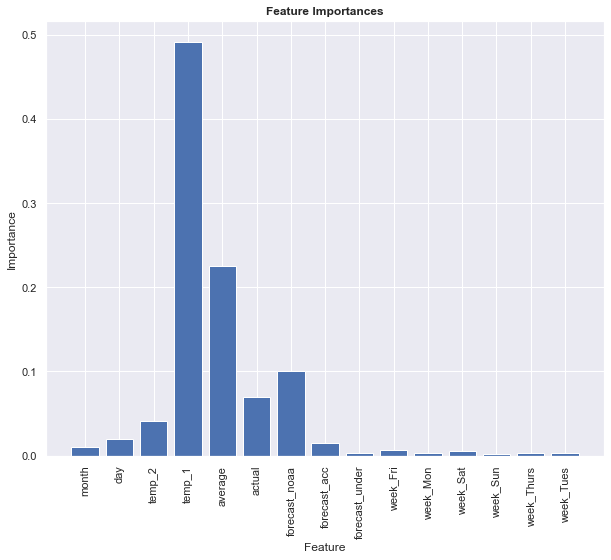

In [21]:
# Visualize feature importances
sns.set_theme()
plt.figure(figsize=(10, 8))
plt.bar(range(len(classes) - 1), model.feature_importances_)

plt.xticks(range(len(classes) - 1), classes, rotation='vertical')

plt.title('Feature Importances', fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Logistic Regression
[[Source](https://realpython.com/logistic-regression-python/)]

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [23]:
# Generate random logistic data
x = np.arange(20).reshape(-1, 1)
y = np.zeros(20) 
y[random.randint(4, 14): 100] = 1

In [24]:
# Create and fit logistic regression model
model = LogisticRegression(solver='liblinear').fit(x, y)

# Sigmoid function: f(x) = 1 / (1 + e^Y)
print(f'Y = {model.intercept_[0]} + {model.coef_[0][0]}')

def f(x):
    return model.intercept_[0] + model.coef_[0][0] * x

Y = -2.007096563312828 + 0.16016833178847242


In [25]:
# Calculate logit, sigmoid, and inaccurate predictions
x_ = x.reshape(len(x))

logit = [f(x) for x in x_]
sigmoid = [1 / (1 + np.exp(-y)) for y in logit]
y_pred = model.predict(x)
x_error = [i for i in range(len(x_)) if y_pred[i] != y[i]]

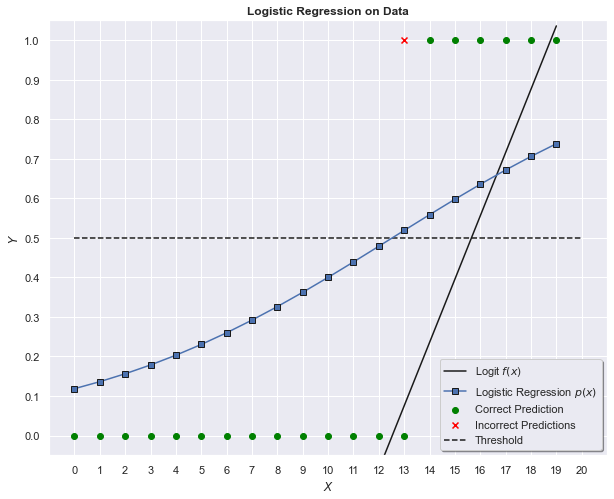

In [26]:
sns.set_theme()
plt.figure(figsize=(10, 8))

plt.scatter(x_, y, marker='o', c='green', label='Correct Prediction')
plt.scatter(x_error, y_pred[x_error], marker='x', c='red', label='Incorrect Predictions')
plt.plot(x_, logit, c='k', label='Logit $f(x$)')
plt.plot(x_, sigmoid, marker='s', mec='k', label='Logistic Regression $p(x)$')
plt.hlines(0.5, 0, 20, ls='dashed', label='Threshold')

plt.xticks(range(0, 21))
plt.yticks(np.linspace(0, 1, 11))
plt.ylim((-0.05, 1.05))
plt.legend(shadow=True, loc='lower right')

plt.title('Logistic Regression on Data', fontweight='bold')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

sns.reset_defaults()

In [27]:
print('Accuracy:', model.score(x, y))

Accuracy: 0.95


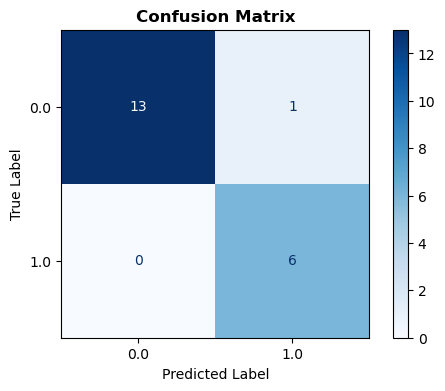

In [28]:
# Plot confusion matrix
plt.figure(figsize=(6 ,4))
ax = plt.axes()

plot_confusion_matrix(model, x, y, ax=ax, cmap='Blues')

plt.grid(False)

plt.title('Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



# K-Means Clustering
[[Source](https://realpython.com/k-means-clustering-python/)]

## Random Dataset

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score as ars

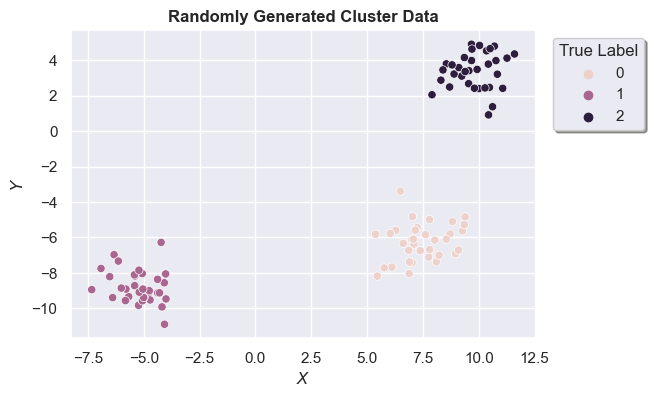

In [31]:
# Generate random Gaussian clusters
features, labels = make_blobs(n_samples=100, centers=3)
x, y = features[:, 0], features[:, 1]

df = pd.DataFrame({'x': x, 'y': y, 'labels': labels})

sns.set_theme()
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(x='x', y='y', hue=labels, data=df)
plt.legend(bbox_to_anchor=(1.25, 1), title='True Label', shadow=True)

plt.title('Randomly Generated Cluster Data', fontweight='bold')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

In [32]:
# Standardize features (standard scaler assumes normal distribution)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
# Elbow method for determining ideal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(init='random', n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\vvgupta\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


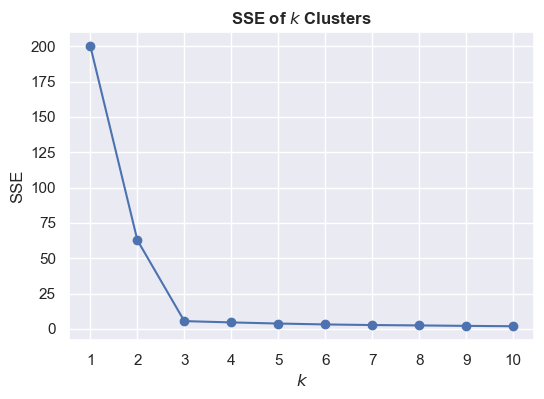

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))

plt.title('SSE of $k$ Clusters', fontweight='bold')
plt.xlabel('$k$')
plt.ylabel('SSE')
plt.show()

In [35]:
# Silhouette method for determining ideal number of clusters
scores = []
for k in range(2, 11):
    kmeans = KMeans(init='random', n_clusters=k)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    scores.append(score)

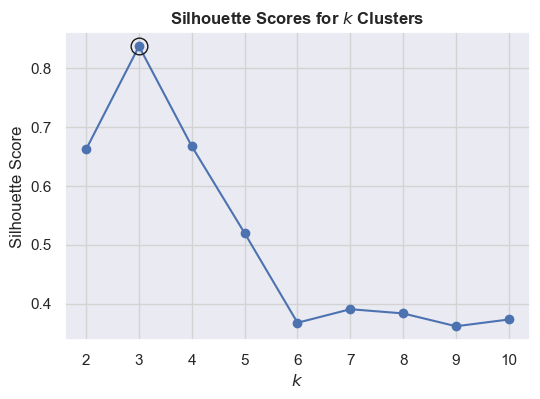

In [36]:
k = np.argmax(scores) + 2

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), scores, marker='o')
plt.plot(k, max(scores), marker='o', ms=12, mfc='none', mec='k')

plt.xticks(range(2, 11))
plt.grid(color='lightgray')

plt.title('Silhouette Scores for $k$ Clusters', fontweight='bold')
plt.xlabel('$k$')
plt.ylabel('Silhouette Score')
plt.show()

In [37]:
# Initialize/run k-means algorithm
kmeans = KMeans(init='random', n_clusters=k)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [38]:
print('MSSE:', kmeans.inertia_)
print('Iterations:', kmeans.n_iter_)

MSSE: 5.5151336373437285
Iterations: 4


In [39]:
print('Predicted Centroids:', kmeans.cluster_centers_)
print('Predicted Labels:', kmeans.labels_)

Predicted Centroids: [[-1.39433841 -0.91719666]
 [ 0.86759524  1.37279533]
 [ 0.51125072 -0.44219871]]
Predicted Labels: [2 0 2 1 2 1 0 1 2 1 0 0 1 0 0 2 1 2 1 0 1 0 2 2 0 2 2 2 1 1 2 2 0 2 2 2 0
 0 1 2 1 1 2 1 0 2 1 0 0 2 1 1 2 0 0 0 1 1 2 2 0 1 2 1 1 1 1 2 1 1 2 0 0 2
 0 0 0 0 0 0 1 1 1 0 2 1 0 0 2 2 2 2 0 0 1 2 0 1 1 2]


In [40]:
# Adjusted rand index for comparing predicted and true labels
print('ARI:', ars(labels, kmeans.labels_))

ARI: 1.0


## Real-Dataset 
[[UC Irvine ML Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz)]

In [41]:
import tarfile
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [42]:
# Download and extract dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/'
archive = 'TCGA-PANCAN-HiSeq-801x20531.tar.gz'

full_url = urllib.parse.urljoin(url, archive)
r = urllib.request.urlretrieve(full_url, archive)

tar = tarfile.open(archive, 'r:gz')
tar.extractall()
tar.close()

In [43]:
# Load data from files
data_file = 'TCGA-PANCAN-HiSeq-801x20531/data.csv'
labels_file = 'TCGA-PANCAN-HiSeq-801x20531/labels.csv'

data = np.genfromtxt(data_file, delimiter=',', usecols=range(1, 20532), skip_header=1)
labels = np.genfromtxt(labels_file, delimiter=',', usecols=(1,), skip_header=1, dtype='str')

In [44]:
# Convert labels from strings to integers
label_encoder = LabelEncoder()
int_labels = label_encoder.fit_transform(labels)
k = len(label_encoder.classes_)

In [45]:
# Build pipeline using preprocessor and clusterer
preprocessor = make_pipeline(MinMaxScaler(), PCA(n_components=2))
clusterer = make_pipeline(KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500))
pipe = Pipeline([('preprocessor', preprocessor), ('clusterer', clusterer)])

In [46]:
# Determine ideal number of dimensions for PCA
silhouette_scores = []
ari_scores = []

for n in range(2, 11):
    pipe['preprocessor']['pca'].n_components = n
    pipe.fit(data)
    preprocessed_data = pipe['preprocessor'].transform(data)
    pred_labels = pipe['clusterer']['kmeans'].labels_
    
    silhouette_scores.append(silhouette_score(preprocessed_data, pred_labels))
    ari_scores.append(ars(labels, pred_labels))

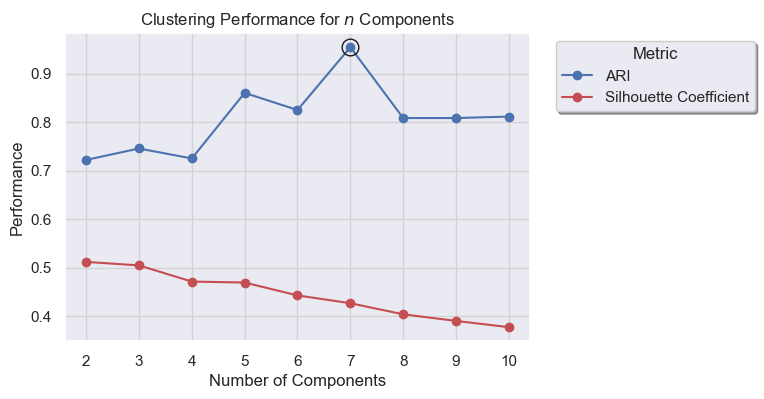

In [47]:
n = np.argmax(ari_scores) + 2

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), ari_scores, marker='o', label='ARI')
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r', label='Silhouette Coefficient')
plt.plot(n, max(ari_scores), marker='o', ms=12, mfc='none', mec='k')

plt.grid(color='lightgray')
plt.legend(bbox_to_anchor=(1.5, 1), shadow=True, title='Metric')

plt.title('Clustering Performance for $n$ Components')
plt.xlabel('Number of Components')
plt.ylabel('Performance')
plt.show()

In [48]:
# Run pipeline on data using 2 components for visualization
pipe['preprocessor']['pca'].n_components = 2
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5,
                                         n_init=50))]))])

In [49]:
# Evaluate pipeline performance
preprocessed_data = pipe['preprocessor'].transform(data)
pred_labels = pipe['clusterer']['kmeans'].labels_
print('Silohouette Score:', silhouette_score(preprocessed_data, pred_labels))

Silohouette Score: 0.511877557823127


In [50]:
print('ARI:', ars(labels, pred_labels))

ARI: 0.722276752060253


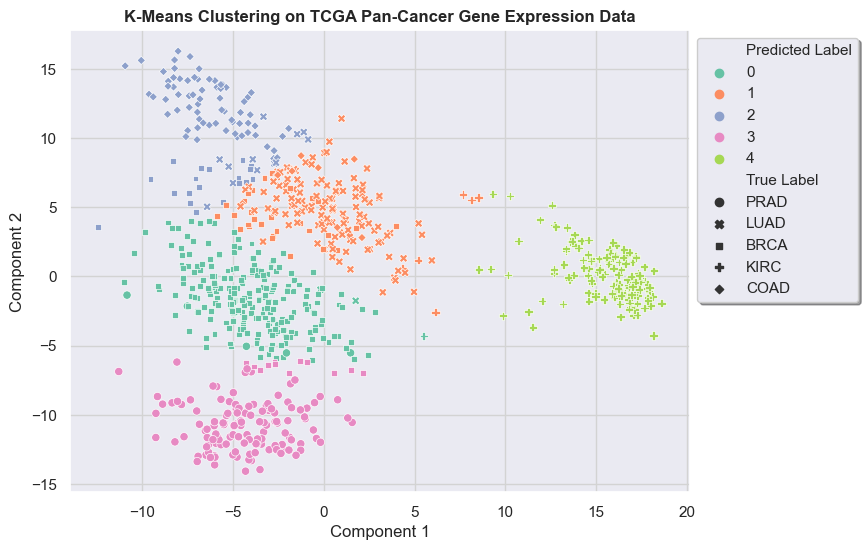

In [51]:
plt.figure(figsize=(8, 6))
df = pd.DataFrame(preprocessed_data, columns=['Component 1', 'Component 2'])
df['True Label'] = labels
df['Predicted Label'] = pipe['clusterer']['kmeans'].labels_
scatter = sns.scatterplot(x='Component 1', y='Component 2', data=df, hue='Predicted Label', 
                          style='True Label', palette='Set2')
scatter.set_title('K-Means Clustering on TCGA Pan-Cancer Gene Expression Data', fontweight='bold')
scatter.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.show()

# Support Vector Machine
[[Source](https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85)]

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
# Generate random Gaussian clusters
features, labels = make_blobs(n_samples=100, centers=[(1, 1), (-1, -1)])
x, y = features[:, 0], features[:, 1]

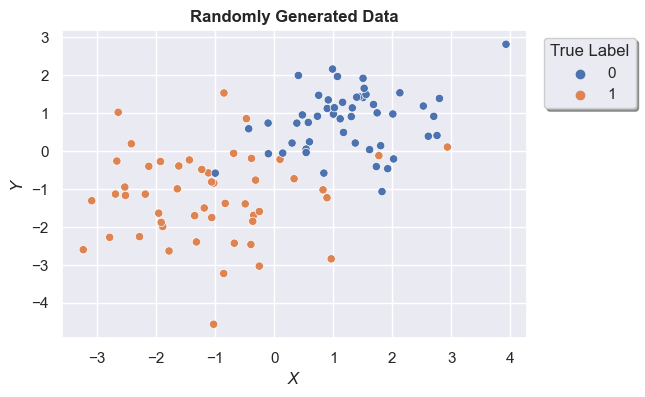

In [54]:
df = pd.DataFrame({'x': x, 'y': y, 'labels': labels})

sns.set_theme()
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(x='x', y='y', hue=labels, data=df)
plt.legend(bbox_to_anchor=(1.25, 1), title='True Label', shadow=True)

plt.title('Randomly Generated Data', fontweight='bold')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

In [55]:
# Split data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [56]:
# Create and fit SVM to training data
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [57]:
# Evaluate SVM on testing data
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [58]:
# Alternatively, perform k-fold cross-validation
kf = KFold(n_splits=5)
res = cross_val_score(model, features, labels, cv=kf)
print('Accuracies:', res)

Accuracies: [0.95 1.   0.8  0.9  0.9 ]


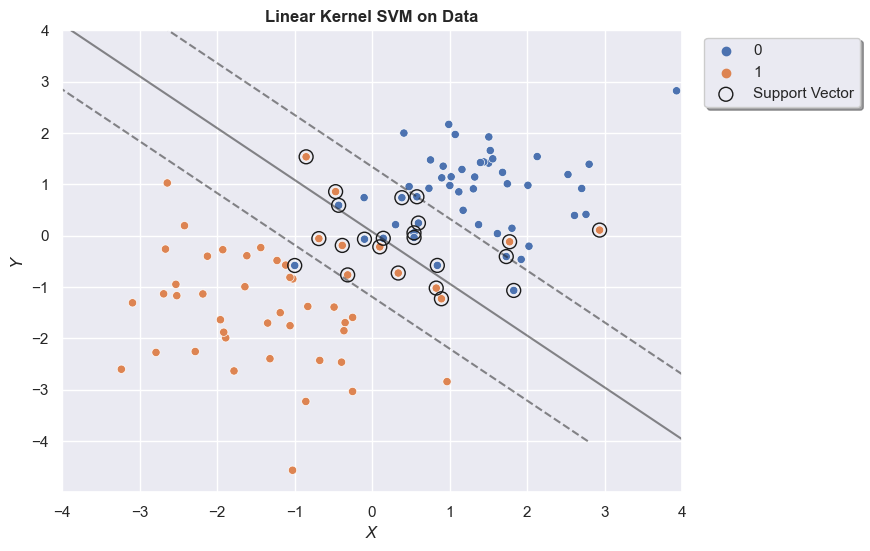

In [59]:
# Visualize support vectors, decision boundary, and margin
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='x', y='y', hue=labels, data=df)

vectors = model.support_vectors_
plt.scatter(vectors[:, 0], vectors[:, 1], s=100, facecolors='none', edgecolor='k', label='Support Vector')

X, Y = np.meshgrid(range(-4, 5), range(-4, 5))
XY = np.vstack([X.ravel(), Y.ravel()]).T
Z = model.decision_function(XY).reshape(X.shape)
plt.contour(X, Y, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'], alpha=0.5)

plt.legend(bbox_to_anchor=(1.3, 1), shadow=True)

plt.title('Linear Kernel SVM on Data', fontweight='bold')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()